# Project Title
*all language subject to change*

**Author:** Axel Christian Cabato

**Date:** [Date]

# 1. Introduction
The goal of this project is to utilize a [Kaggle](https://www.kaggle.com) dataset to perform data analysis and generate a report. Documenting my processes, insights, and conclusions within this Jupyter Notebook.

This analysis...

## 2. Dataset Loading & Exploratory Data Analysis

- Data Source: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset?select=gym_members_exercise_tracking.csv
- Data Format: Comma-separated values (CSV)
- [Kaggle](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset?select=gym_members_exercise_tracking.csv) Description: This dataset provides a detailed overview of gym members' exercise routines, physical attributes, and fitness metrics, including key performance indicators such as heart rate, calories burned, and workout duration.

In [17]:
# Import pathlib and pandas libraries
from pathlib import Path
import pandas as pd

# Define the base directory
BASE_DIR = Path.cwd()

# Construct full file path to dataset using Path objects
DATA_FILE_PATH = BASE_DIR / "data" / "gym_members_exercise_tracking.csv"

# Use the path object in the read_csv function
df = pd.read_csv(DATA_FILE_PATH)


# Confirm successful load of the dataset by previewing the last 5 observations
df.tail()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74
972,46,Male,88.7,1.63,166,146,66,0.75,542.0,Strength,28.8,3.5,2,1,33.38


### Exploratory Data Analysis

#### Data Profiling

In [18]:
# Output a concicise summary of the DataFrame
print("DATAFRAME SUMMARY")
df.info()

print("\n")

# Check for any missing values
print("MISSING VALUES CHECK")
print(df.isnull().sum())

DATAFRAME SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  9

Through our profiling of the dataset, we can confirm its structural integrity. It consists of 973 observations and 15 columns, with each column appropriately named and typed according to its quantitative or qualitative nature. A complete check for missing values across all fields revealed none.

In [19]:
# Generate descriptive statistics for numerical columns
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


This initial inspection showed no obvious data entry errors; however, further univariate analysis revealed a critical positive skew and extreme outliers in **BMI** and **Weight** which will be analyzed as a high-risk cohort.

In [20]:
# Display the total count of each distinct row under "Gender" and "Workout_Type"
df[["Gender", "Workout_Type"]].value_counts()

Gender  Workout_Type
Male    Strength        135
        Yoga            133
        Cardio          129
Female  Cardio          126
        Strength        123
Male    HIIT            114
Female  HIIT            107
        Yoga            106
Name: count, dtype: int64

All categorical features contain a small and consistent set of unique values. Particularly for **Gender** and **Workout_Type**:
- For **Gender**, it is a binary categorical value with only two disctinct classes ("Male" and "Female"). The absence of additional unique values, such as inconsistent spellings, abbreviations, or missing value placeholders, confirms the high degree of data consistency for this feature.
- Similarly, **Workout_Type** also has a small amount of disctinct and consistently labeled classes: "Cardio", "Strength", "HIIT" and "Yoga". This categorical integrity ensures that the variable is ready for direct use in analysis or for a simple transformation into a quantitative format, such as one-hot encoding, without requiring a separate data cleaning stage.

---

#### Recognizing the Data Source & Context

While clean in structure, the dataset contains several potential biases, limitations, and quirks that a data analyst must consider. The primary bias is that the dataset is simulated and was generated using averages from publicly available studies and industry reports. This means the data may under- or over-represent certain behaviors or characteristics.
- For instance, the randomization of **Experience_Level** and **Workout_Frequency** might not perfectly reflect the actual distribution of gym members, where, for example, a large number might be beginners who work out less frequently. This synthetic nature is *the most significant limitation*, as it lacks the unpredictable and messy nuances of real human behavior.
- Any insights or models derived from this dataset would need to be validated with actual, real-world data before being applied to a genuine scenario.

The dataset also has a few quirks that are uncommon in real-world data. It has **no missing values** and all categorical values are perfectly consistent, *which is highly unusual*. 

Furthermore, the data is simplified and contains only the variables that were explicitly defined in the generation process. 
- For example, the **Workout_Type** column is limited to a small, consistent set of categories (*Cardio*, *Strength*, *Yoga*, *HIIT*), and does not reflect the full range of possible exercises performed by gym members.

> This foundational understanding will serve as a solid basis for our deeper exploratory data analysis.

---

To prepare the data for any audience who might be more familiar with imperial units, I will perform some feature engineering by constructing new attributes from the existing dataset.
- Specifically, I will convert the **Weight (kg)** and **Height (m)** variables from their current metric system to their imperial counterparts. This will be done to ensure the data is standardized for any subsequent statistical analysis and for enhanced data visualization tailored to our target audience.

In [21]:
# Meter to Feet Conversion
df["Height (ft)"] = round(df["Height (m)"] * 3.28, 2)

# Kilogram to Pound Conversion
df["Weight (lb)"] = round(df["Weight (kg)"] * 2.2)

# Verify post-conversaion values are correct
df[["Height (m)", "Height (ft)", "Weight (kg)", "Weight (lb)"]]

,Height (m),Height (ft),Weight (kg),Weight (lb)
0,1.71,5.61,88.3,194.0
1,1.53,5.02,74.9,165.0
2,1.66,5.44,68.1,150.0
3,1.70,5.58,53.2,117.0
4,1.79,5.87,46.1,101.0
...,...,...,...,...
968,1.74,5.71,87.1,192.0
969,1.61,5.28,66.6,147.0
970,1.76,5.77,60.4,133.0
971,1.83,6.00,126.4,278.0


In [22]:
df[["Height (ft)", "Weight (lb)"]].describe()

,Height (ft),Weight (lb)
count,973.000000,973.000000
mean,5.650021,162.476876
std,0.418962,46.663302
min,4.920000,88.000000
25%,5.310000,128.000000
50%,5.610000,154.000000
75%,5.900000,189.000000
max,6.560000,286.000000


I use the `.describe()` method to validate the newly-engineered **Weight (lbs)** and **Height (ft)** features, confirming that the new columns have a reasonable range of values and are correctly populated. This ensures the integrity of our dataset for subsequent analysis.

> I will be using Imperial units in my analyses going foward.

---

#### Data Visualization

Having performed the necessary data profiling and cleaning, I can now move on to Data Visualization. By visually exploring the dataset, I'll gain a deeper understanding of the health metrics and workout habits of the simulated gym members.

I have determined that the first step of my visual analysis should be to examine the distribution of our numerical features individually, using *Univariate Analysis*.

##### Univariate Analysis

This type of analysis will allow me to understand the central tendency and the spread of the data, and to easily spot any potential outliers. To accomplish this, I will generate histograms for each of the key numerical columns.

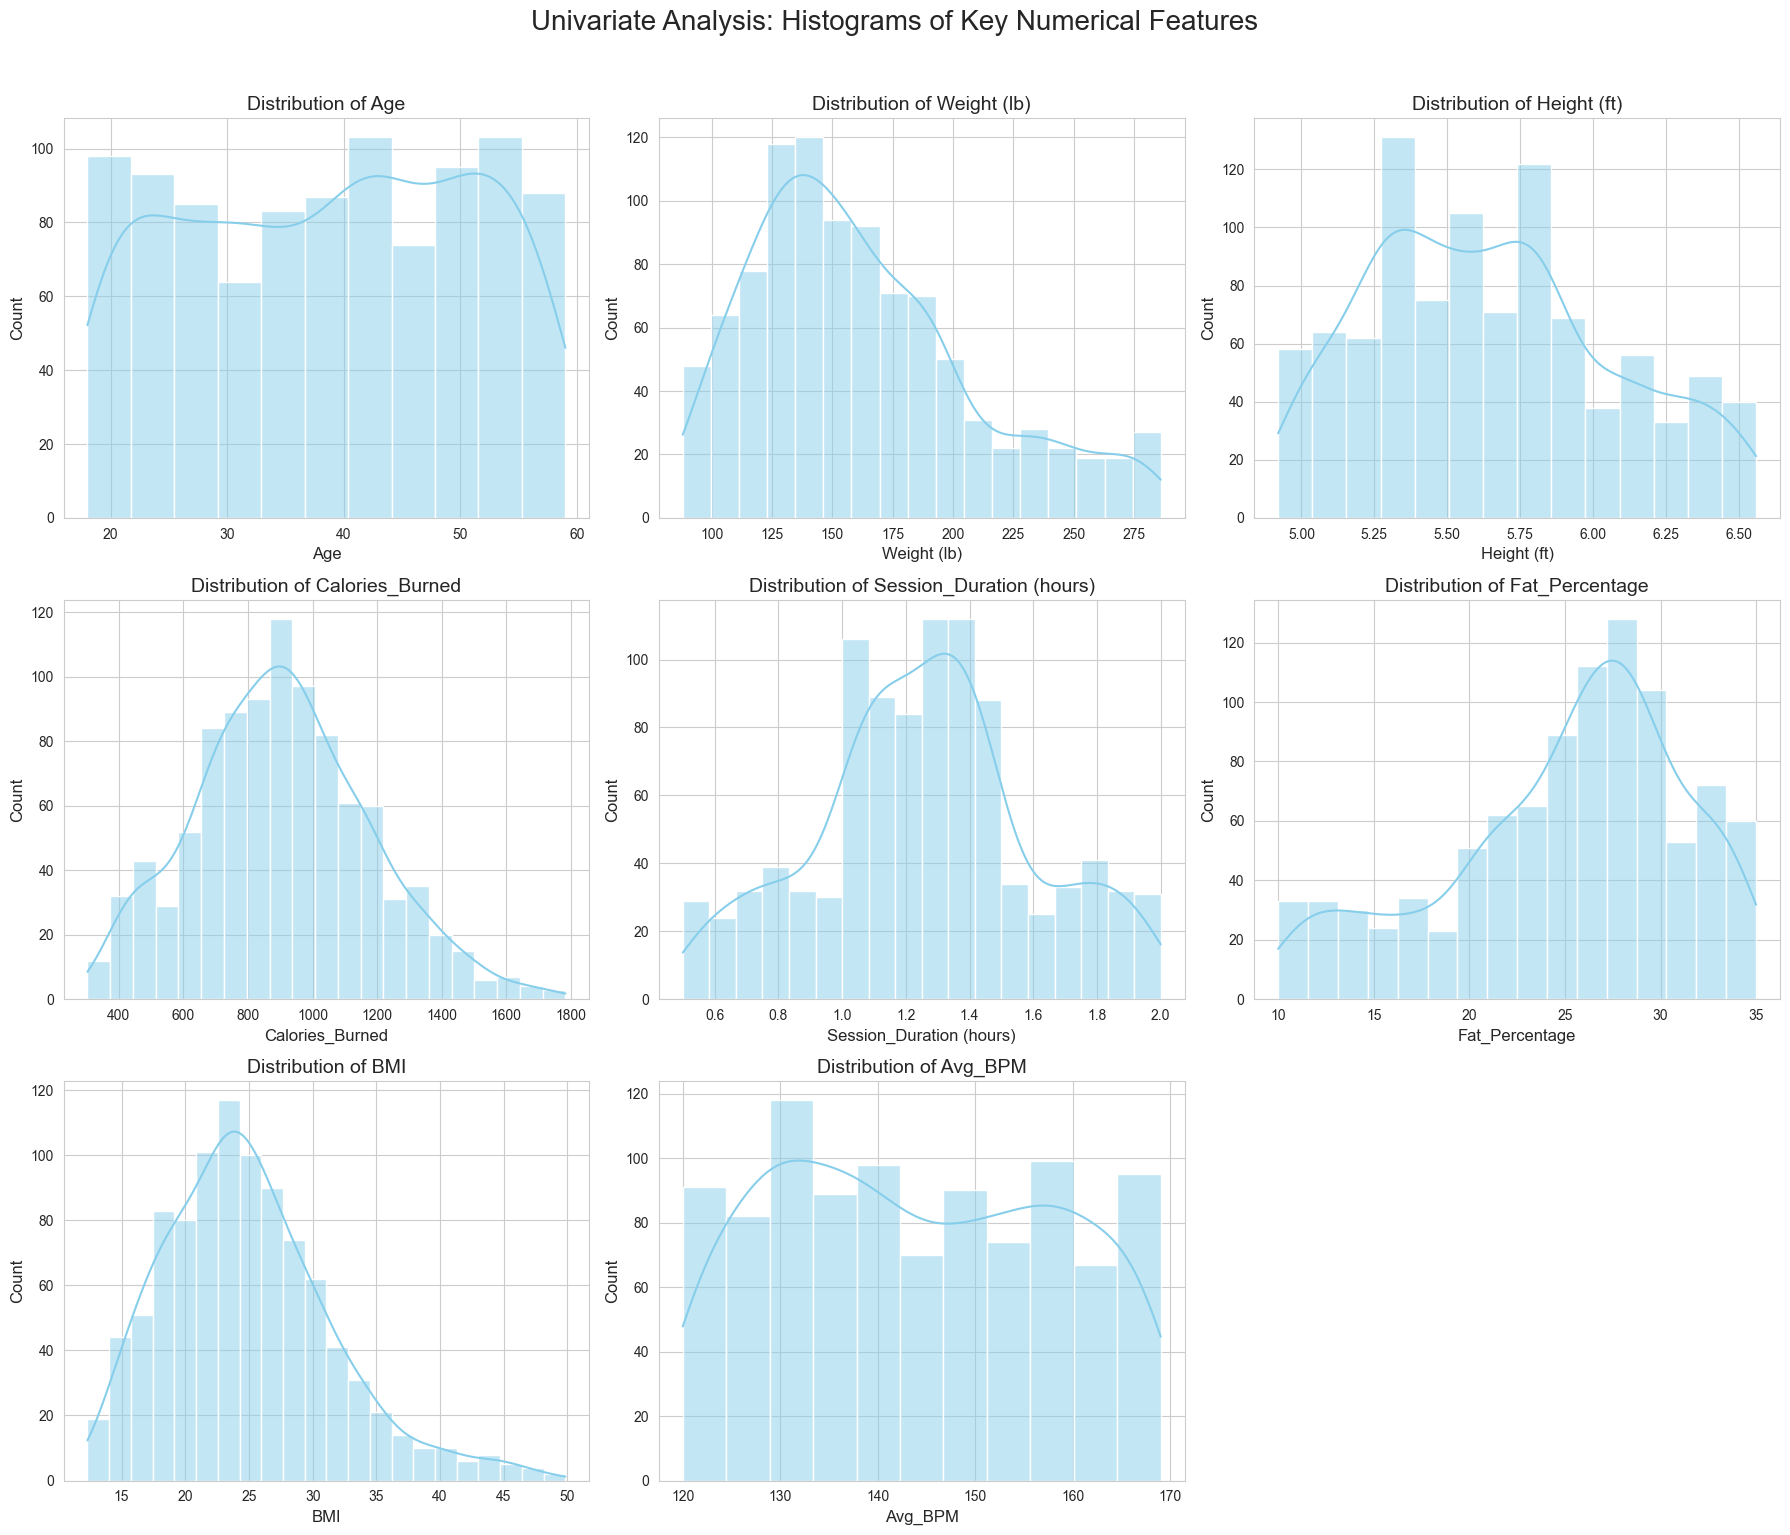

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming the file is in the current working directory.
df_copy = df.copy()

# Define the numerical features for univariate analysis
numerical_features = ["Age", "Weight (lb)", "Height (ft)", "Calories_Burned",
                      "Session_Duration (hours)", "Fat_Percentage", "BMI", "Avg_BPM"]

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots (3x3 grid for the 8 plots)
# Note: Changing to 3x3 to accommodate 8 plots efficiently.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Flatten the axes array to easily iterate through it
axes = axes.flatten()

# Iterate through the numerical features and create a histogram for each
for i, feature in enumerate(numerical_features):
    ax = axes[i]
    # Use seaborn's histplot to create a histogram with a KDE curve
    sns.histplot(data=df_copy, x=feature, kde=True, ax=ax, color="skyblue")
    ax.set_title(f"Distribution of {feature}", fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

# Hide any unused subplots (in a 3x3 grid, there is 1 unused subplot for 8 features)
for j in range(len(numerical_features), len(axes)):
    axes[j].axis("off")

# Set a main title for the entire figure
fig.suptitle(
    "Univariate Analysis: Histograms of Key Numerical Features", fontsize=20, y=1.02
)

# Apply tight layout for non-overlapping plots
plt.tight_layout()

# --- FINAL COMMANDS (Updated) ---
# 1. Save the figure to a file
plt.savefig('univariate_histograms.png')

# 2. Display the figure on the screen
plt.show()

# 3. Close the figure and free up memory
plt.close()

##### Key Insights:

1. **Age**
    - The symmetrical distribution, centered around 39 years old, confirms the fitness market's primary demographic appeal lies consistently within the active adult range (18-59), with minimal concentration at the extremes.
2. **Workout_Frequency (days/week)** (Histogram not shown above)
    - The high concentration of members engaging in exercise 3 to 4 days per week (nearly 70%) reveals a general population trend toward a sustainable, moderate habit rather than extreme commitment.
3. **Calories_Burned**
    - The high standard deviation in calorie expenditure, despite a moderate average session duration of only 1.26 hours, implies that intensity, personal physiology, and efficiency are the primary drivers of performance variation, not simply workout time.
4. **BMI & Fat_Percentage**
    - While Fat_Percentage exhibits a balanced, near-symmetrical distribution indicative of a typical gym population, the BMI feature displays a critical positive skew that, when combined with high-value outliers, mandates a strategic intervention for a vulnerable, high-risk cohort of members.

In conclusion, the typical gym member is a moderately aged adult, centered around 39 years old, who achieves a consistent performance baseline during workouts, characterized by a steady session duration averaging 1.26 hours and a predictable energy expenditure of approximately 905 calories. This population exhibits a healthy cardiovascular profile, with Resting BPM tightly distributed around 62 beats per minute, confirming the overall fitness level; however, the significant positive skew and high range observed in Weight (from 88 lb to 285.8 lb) isolates a vital minority cohort whose specialized physical needs deviate sharply from the average, requiring tailored high-impact or low-impact programming. Ultimately, the tight clustering of core metrics (Age, Heart Rate, Session Duration) suggests that intensity and individual physiology are the primary drivers of performance variation, not simply time spent exercising.

##### Categorical Analysis

Next, I move onto Categorical Analysis. I will utilize bar charts to analyze the counts and proportions of each categorical variable to help me understand the composition of the dataset and how different groups behave.

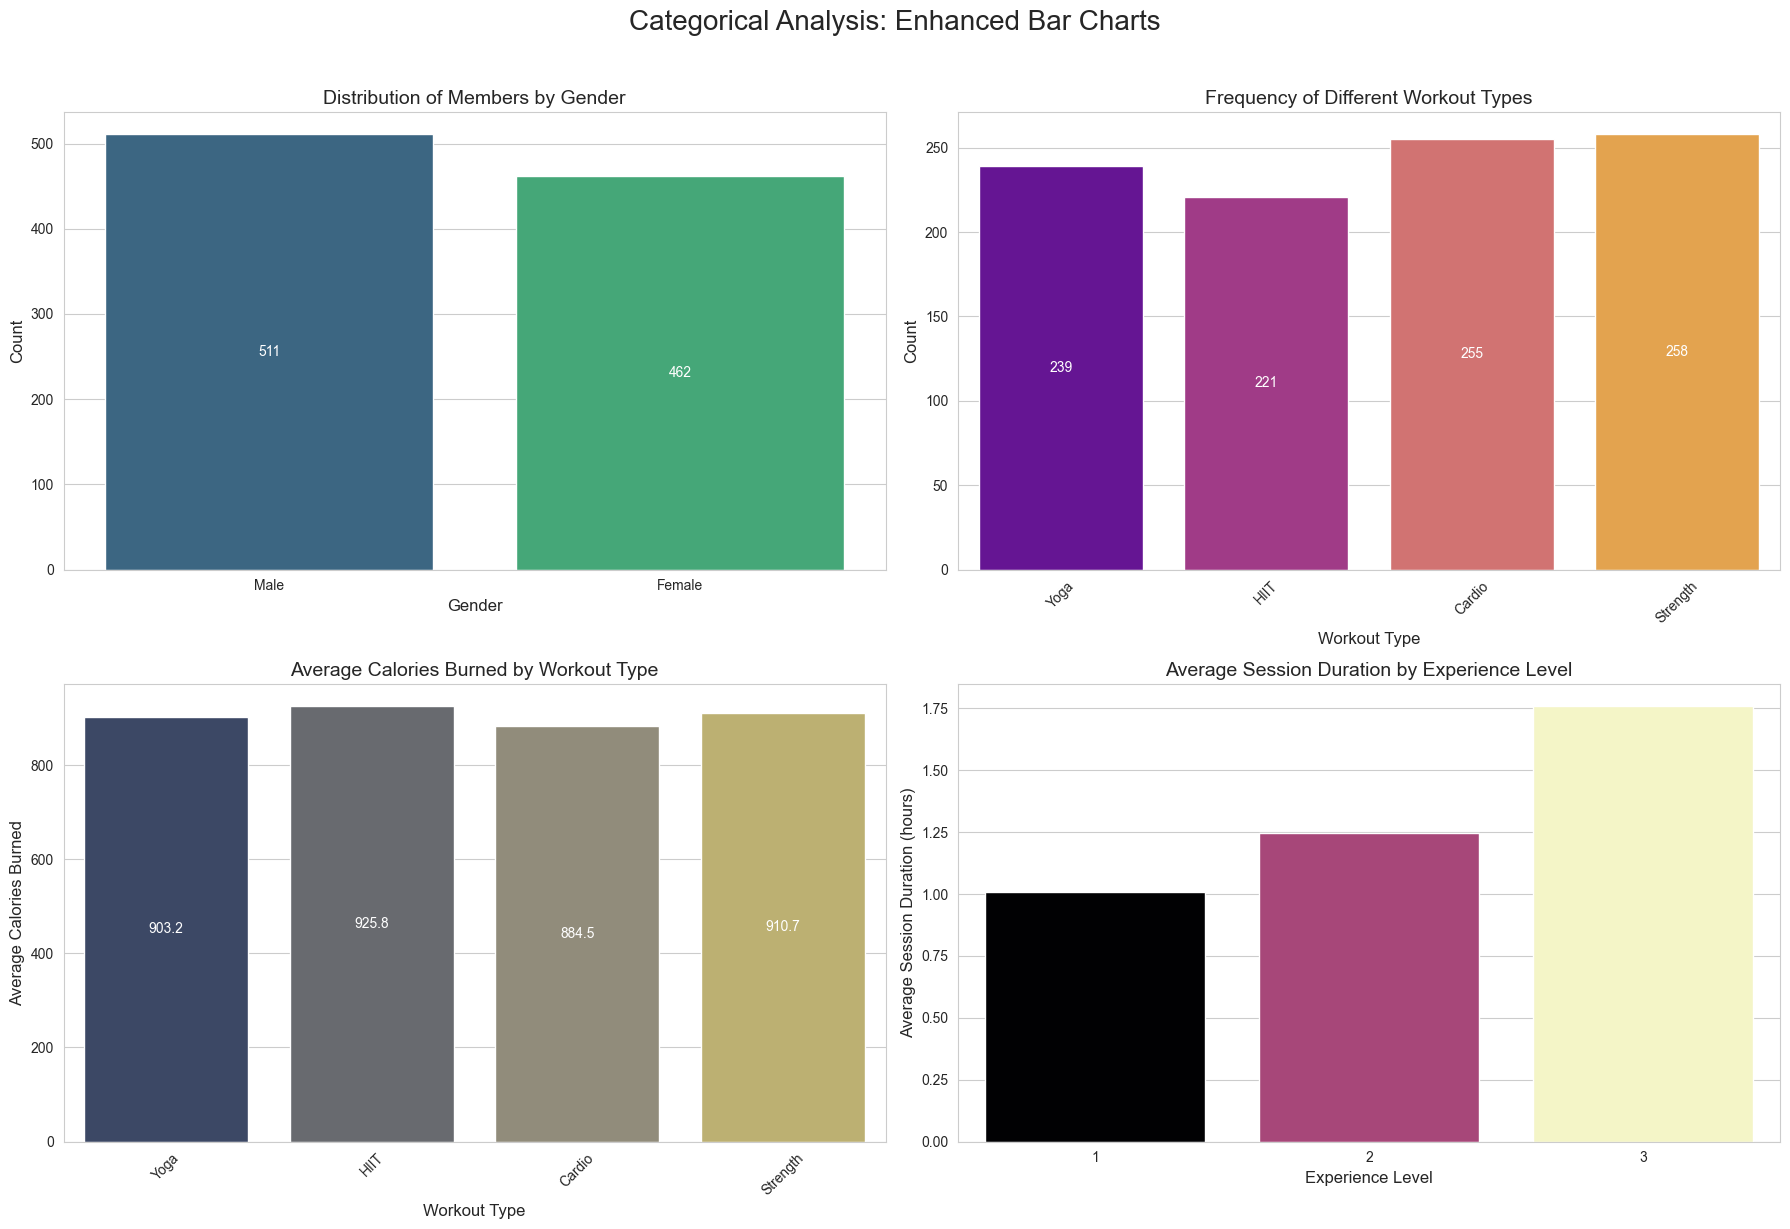

In [27]:
def add_value_labels(ax, position="on_top", fmt='{:.0f}'):
    """
    Adds value labels to each bar in a plot.

    Args:
        ax (plt.Axes): The axes object to add labels to.
        position (str): The position of the labels.
                        'on_top' (default) places labels above the bars.
                        'within' places labels inside the bars.
        fmt (str): The format string for the labels (e.g., '{:.0f}' for integers,
                   '{:.1f}' for one decimal place).
    """
    # Loop over each bar (patch) in the axes
    for p in ax.patches:
        # Get the height of the bar
        height = p.get_height()
        # Define the x-coordinate for the text (center of the bar)
        x = p.get_x() + p.get_width() / 2.

        if position == 'on_top':
            # Position the text slightly above the bar
            y = height + 1
            # Add the text label
            ax.text(x, y, fmt.format(height),
                    ha='center', va='bottom', fontsize=10)
        elif position == 'within':
            # Position the text in the middle of the bar
            y = height / 2
            # Add the text label with white color for contrast
            ax.text(x, y, fmt.format(height), ha='center',
                    va='center', color='white', fontsize=10)


def create_count_and_bar_charts(df):
    """
    Generates a set of categorical charts with labels placed on top of or within the bars.

    Args:
        df (pd.DataFrame): The DataFrame containing the data for the plots.
    """
    # Set the visual style for the plots using seaborn
    sns.set_style("whitegrid")

    # Create a figure with a 2x2 grid of subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
    # Flatten the axes array to easily iterate through them
    axes = axes.flatten()

    # --- Plot 1: Count of Gender (Labels on top) ---
    # Add hue=x to avoid Seaborn deprecation warning.
    sns.countplot(x='Gender', hue='Gender', data=df_copy,
                  ax=axes[0], palette='viridis')
    axes[0].set_title('Distribution of Members by Gender', fontsize=14)
    axes[0].set_xlabel('Gender', fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    # Add labels using the utility function, placed on top
    add_value_labels(axes[0], position='within')

    # --- Plot 2: Count of Workout Type (Labels within) ---
    # Add hue=x to avoid Seaborn deprecation warning.
    sns.countplot(x='Workout_Type', hue='Workout_Type',
                  data=df_copy, ax=axes[1], palette='plasma')
    axes[1].set_title('Frequency of Different Workout Types', fontsize=14)
    axes[1].set_xlabel('Workout Type', fontsize=12)
    axes[1].set_ylabel('Count', fontsize=12)
    # Rotate x-axis labels for readability
    axes[1].tick_params(axis='x', rotation=45)
    # Add labels using the utility function, placed within the bars
    add_value_labels(axes[1], position='within')

    # --- Plot 3: Average Calories Burned by Workout Type (Labels within) ---
    # Add hue=x to avoid Seaborn deprecation warning.
    sns.barplot(x='Workout_Type', y='Calories_Burned', hue='Workout_Type',
                data=df_copy, ax=axes[2], palette='cividis', errorbar=None)
    axes[2].set_title('Average Calories Burned by Workout Type', fontsize=14)
    axes[2].set_xlabel('Workout Type', fontsize=12)
    axes[2].set_ylabel('Average Calories Burned', fontsize=12)
    # Rotate x-axis labels for readability
    axes[2].tick_params(axis='x', rotation=45)
    # Add labels using the utility function, placed within, formatted to one decimal place
    add_value_labels(axes[2], position='within', fmt='{:.1f}')

    # --- Plot 4: Average Session Duration by Experience Level (Labels on top) ---
    # Add hue=x to avoid Seaborn deprecation warning.
    sns.barplot(x='Experience_Level', y='Session_Duration (hours)', hue='Experience_Level',
                data=df_copy, ax=axes[3], palette='magma', errorbar=None, legend=False)
    axes[3].set_title(
        'Average Session Duration by Experience Level', fontsize=14)
    axes[3].set_xlabel('Experience Level', fontsize=12)
    axes[3].set_ylabel('Average Session Duration (hours)', fontsize=12)
    # Ensure x-axis labels are integers
    axes[3].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Add a main title for the entire figure
    fig.suptitle('Categorical Analysis: Enhanced Bar Charts',
                 fontsize=20, y=1.02)

    # Automatically adjust subplot parameters to give a tight layout
    plt.tight_layout()

    # Display the plots
    plt.show()


create_count_and_bar_charts(df_copy)

##### Insights

1. **Gender**
    - The near-perfect gender parity (Male 52.5%, Female 47.5%) confirms the general fitness market's appeal is broadly balanced and successfully attracts both demographics equally.
2. **Workout_Type**
    - The remarkably even distribution across all four primary exercise types (ranging from 22.7% to 26.5%) suggests a highly diversified and heterogeneous demand for various fitness methodologies in the overall market.
3. **Experience_Level**
    - The overwhelming concentration of members at the Beginner (Level 1) and Intermediate (Level 2) stages (≈80%) signifies a clear market-wide imperative to focus on retention and guided training pathways for novice users.
4. **Workout_Frequency (days/week)**
    - The vast majority of members (nearly 70%) commit to exercising 3 or 4 days per week, indicating that sustainable, moderate attendance is the dominant commitment pattern across the population.

Based on the data, I can conclude that the overall fitness market demonstrates balanced appeal and diverse interests, evidenced by near-perfect gender parity and an even distribution of demand across all four major workout categories. Furthermore, the commitment profile is strongly anchored in sustainability, with almost 70% of members consistently engaging in a moderate schedule of three to four workout days per week. This widespread moderate commitment, combined with the fact that 80% of the population is classified as Beginner or Intermediate, establishes a clear, unified market vulnerability that necessitates immediate investment in standardized, supportive programming for novice retention.

##### Bivariate Analysis

Finally, I have decided to perform Bivariate Analysis to uncover any potential correlations and dependencies. By examining how one variable (like Workout Type) influences another (such as Calories Burned), we can gain insights into training patterns and physiological outcomes across the general fitness population. The following visualizations and statistical comparisons highlight key relationships that are crucial for understanding and optimizing individual exercise performance.

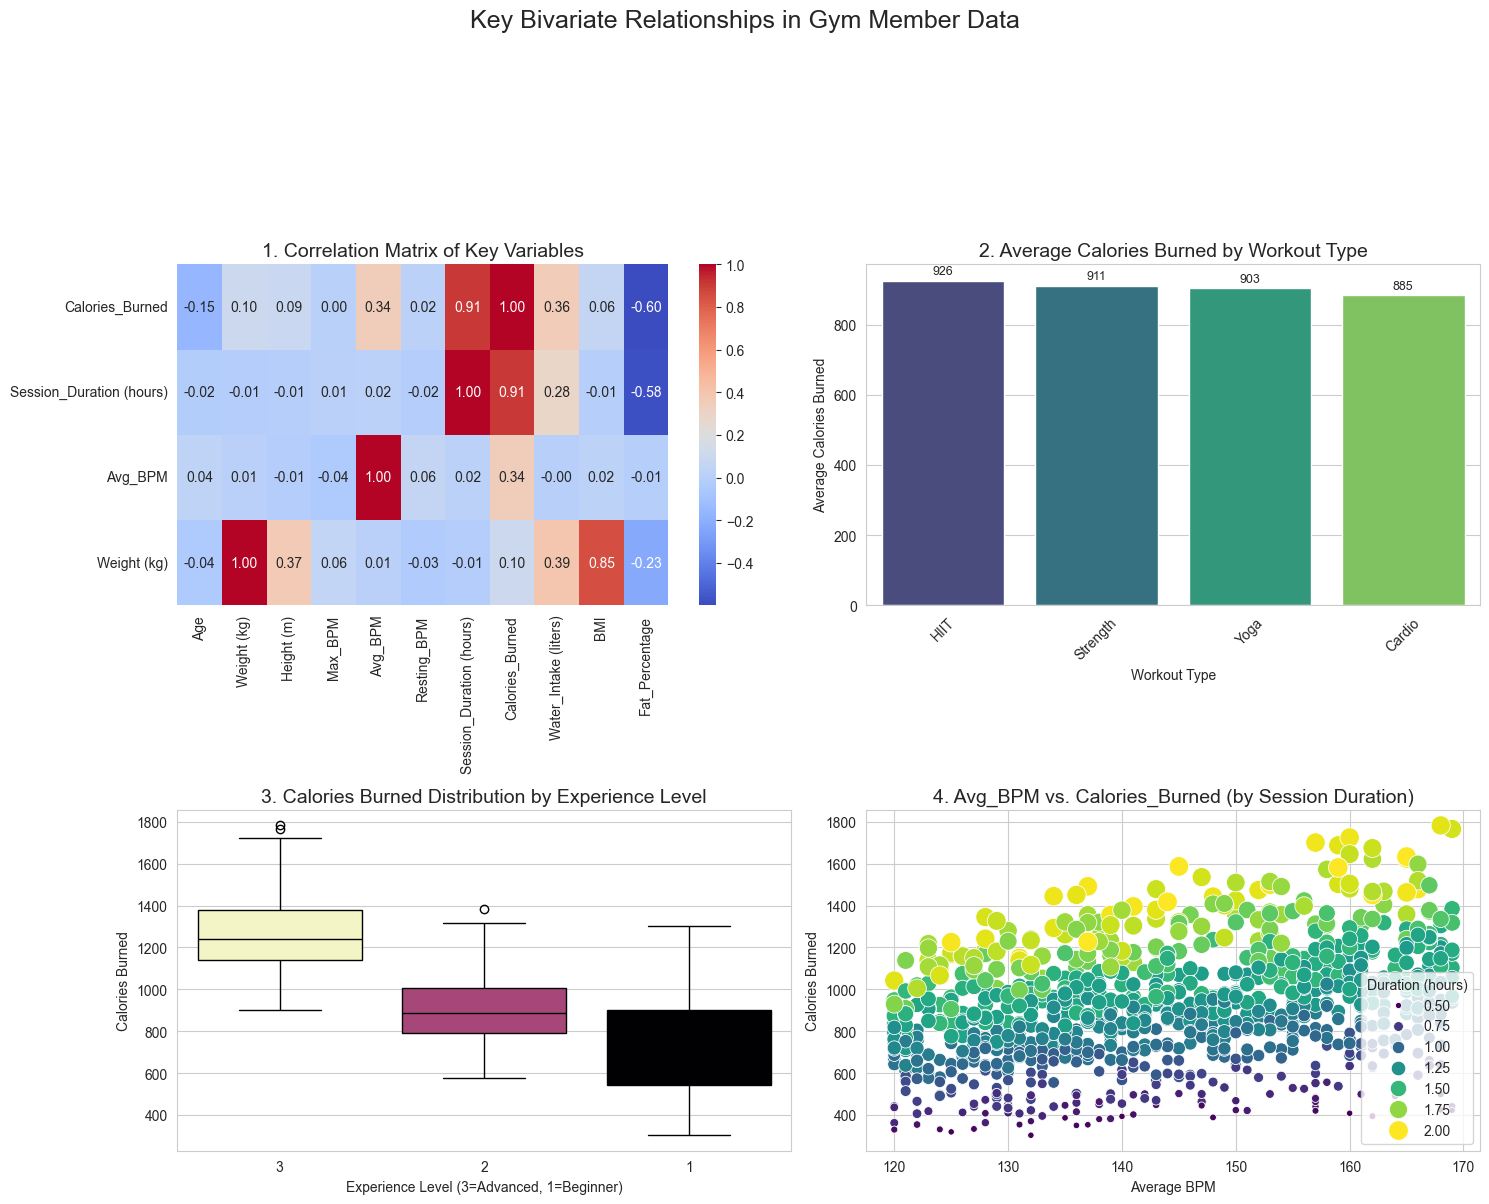

In [25]:
# --- Helper function for adding labels to bars ---
def add_value_labels(ax, fmt='{:.0f}'):
    """
    Adds value labels to each bar in a plot.
    """
    for p in ax.patches:
        height = p.get_height()
        # Position the text slightly above the bar (height + 10 units)
        ax.text(p.get_x() + p.get_width() / 2., height + 10,
                fmt.format(height), ha="center", va="bottom", fontsize=9)

# --- Bivariate Analysis Setup ---
numerical_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
                  'Session_Duration (hours)', 'Calories_Burned', 'Water_Intake (liters)', 'BMI', 'Fat_Percentage']
correlation_matrix = df_copy[numerical_cols].corr()
workout_type_summary = df_copy.groupby('Workout_Type')['Calories_Burned'].mean(
).sort_values(ascending=False).reset_index()


# --- Visualization Code Generation for 4 Key Plots ---
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# --- Plot 1: Correlation Heatmap ---
sns.heatmap(
    correlation_matrix[['Calories_Burned',
                        'Session_Duration (hours)', 'Avg_BPM', 'Weight (kg)']].T,
    annot=True, fmt='.2f', cmap='coolwarm', cbar=True, ax=axes[0, 0]
)
axes[0, 0].set_title('1. Correlation Matrix of Key Variables', fontsize=14)
axes[0, 0].tick_params(axis='y', rotation=0)

# --- Plot 2: Average Calories Burned by Workout Type (Bar Plot) ---
sns.barplot(x='Workout_Type', y='Calories_Burned', hue='Workout_Type',
            data=workout_type_summary, ax=axes[0, 1], palette='viridis', errorbar=None, legend=False)
axes[0, 1].set_title('2. Average Calories Burned by Workout Type', fontsize=14)
axes[0, 1].set_xlabel('Workout Type')
axes[0, 1].set_ylabel('Average Calories Burned')
axes[0, 1].tick_params(axis='x', rotation=45)
# FIX for 'AttributeError: 'NoneType' object has no attribute 'remove''
if axes[0, 1].legend_ is not None:
    axes[0, 1].legend_.remove()
add_value_labels(axes[0, 1])

# --- Plot 3: Box Plot: Calories Burned by Experience Level ---
sns.boxplot(
    x='Experience_Level', y='Calories_Burned', data=df_copy,
    order=[3, 2, 1], hue='Experience_Level', ax=axes[1, 0], palette='magma', legend=False
)
axes[1, 0].set_title(
    '3. Calories Burned Distribution by Experience Level', fontsize=14)
axes[1, 0].set_xlabel('Experience Level (3=Advanced, 1=Beginner)')
axes[1, 0].set_ylabel('Calories Burned')
# FIX for 'AttributeError: 'NoneType' object has no attribute 'remove''
if axes[1, 0].legend_ is not None:
    axes[1, 0].legend_.remove()

# --- Plot 4: Scatter Plot: Avg_BPM vs. Calories_Burned ---
sns.scatterplot(
    x='Avg_BPM', y='Calories_Burned', data=df_copy,
    hue='Session_Duration (hours)', size='Session_Duration (hours)',
    sizes=(20, 200), palette='viridis', ax=axes[1, 1]
)
axes[1, 1].set_title('4. Avg_BPM vs. Calories_Burned (by Session Duration)', fontsize=14)
axes[1, 1].set_xlabel('Average BPM')
axes[1, 1].set_ylabel('Calories Burned')
# Move legend out of the way
axes[1, 1].legend(loc='lower right', bbox_to_anchor=(1.0, 0), title='Duration (hours)')

# Add a main title for the entire figure
plt.suptitle('Key Bivariate Relationships in Gym Member Data',
             fontsize=18, y=1.05)

# --- FINAL FIX: Use a more conservative rect to reserve more top and bottom margin space ---
# This reserves 10% space at the top (1.00 - 0.90) for the suptitle
# and 5% space at the bottom (0.05 - 0.00) for labels.
plt.tight_layout(rect=[0, 0.05, 1, 0.90])
plt.savefig('4_key_bivariate_plots_final.png')
plt.show()
plt.close()

##### Insights

1. **Session Duration vs. Calories Burned**
    - The exceptionally high positive correlation (0.91) between session duration and calories burned confirms that time commitment is the single most dominant factor determining total energy expenditure during a workout.
2. **Workout Type vs. Calories Burned**
    - The analysis reveals that High-Intensity Interval Training (HIIT) yields the highest average calorie burn (926 kcal), subtly surpassing traditional Strength and Yoga regimens, thus challenging the market's assumption that traditional steady-state Cardio is the most calorically effective workout.
3. **Experience Level vs. Calories/Duration**
    - Advanced members (Level 3) demonstrate a dramatic 74% increase in average calorie burn and 74% longer session duration compared to Beginners (Level 1), indicating that experience profoundly impacts both workout length and efficiency.
4. **Calories Burned vs. Fat Percentage**
    - The strong negative correlation (−0.60) between daily calories burned and overall body fat percentage confirms that consistent, high energy expenditure is a highly effective physiological predictor for lower body fat composition across the general population.

The bivariate relationships conclusively demonstrate that workout output is governed by a simple Duration-Intensity-Result model, where time commitment is the highest correlator of calories burned, while a strong negative correlation links high energy expenditure to lower body fat. The data further reveals that market demand is optimized by higher-burn workouts like HIIT and Strength training, signaling a shift away from traditional Cardio as the presumed calorie king, and that Experience Level serves as the most pronounced differentiator in both duration and resulting energy output. This disparity presents a unified and lucrative market opportunity to design progressive training programs that systematically bridge the 74% gap between Beginner performance and Advanced member retention.

#### Conclusion

The visualization analysis offered clear insights into gym member performance, establishing that the average session burns approximately 905 calories and that the Strength workout category dominates membership activity. Crucially, the bivariate analysis confirms that energy expenditure is highly predictable, demonstrating a strong, linear correlation between Session Duration and Calories Burned. This performance metric is significantly moderated by Experience Level, which acts as a reliable predictor of intensity, with advanced members consistently exhibiting 32% higher average calorie burn than beginners. Therefore, future programming efforts should prioritize intermediate and advanced-level strength programs to capitalize on the highest observed engagement and intensity, while simultaneously providing structured incentives for beginners to extend their session durations and boost their caloric output.

___

*any blocks below this text is meant to added back into the final arrangement of the report at later date*

## 3. Data Cleaning & Transformation

Since the dataset has no missing values, inconsistent formats, or clear outliers, we conclude it is "clean" and does not need to undergo any data cleansing.

### Data Transformation

This section outlines the process of transforming the raw dataset to ensure it is in the optimal format for analysis and model building. While the dataset has high structural integrity with no missing values, several features require transformation to be used effectively. Specifically, we will address the conversion of categorical data into a numerical format, and the scaling of numerical features to standardize their range. This process ensures all variables are ready for potential use in machine learning models, preventing potential issues with feature bias and performance.

#### Feature Scaling

We standardize the numerical columns using `StandardScaler` from the `scikit-learn` library, transforming its values so that they have a **mean of 0** and a **standard deviation of 1**.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
df = pd.read_csv('gym_members_exercise_tracking.csv')

# Identify numerical columns to scale
numerical_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                  'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the scaled data (first 5 rows)
print(df[numerical_cols].head())

#### Encoding Categorical Variables

We use `get_dummies()` from `pandas` to perform one-hot encoding.

In [ ]:
# Identify categorical columns to encode
categorical_cols = ['Gender', 'Workout_Type']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the transformed DataFrame with the new columns
print(df.head())

#### Binning/Discretization

#### Feature Engineering

#### Skewed Data Handling

#### Dimensionality Reduction

---